In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv('/content/sample_data/Social_Network_Ads.csv')


In [3]:
df=df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
mapi={'Male':1,'Female':0}                        ####Typeconversion of Gender from Male-Female to 1-0
df=df.replace(mapi)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [13]:
# df.drop(['User ID'],axis=1,inplace=True)
df.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [26]:
x = df[["Gender","Age" , "EstimatedSalary"]]
y = df["Purchased"]

In [27]:
df.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [28]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [31]:

classifier=LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [32]:
ypred=classifier.predict(xtest)

In [33]:

cm=confusion_matrix(ytest,ypred)
print('Confusion matrix: \n',cm)

Confusion matrix: 
 [[68  0]
 [32  0]]


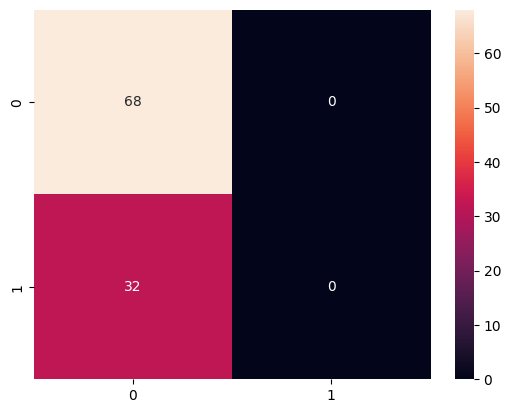

In [34]:
sns.heatmap(cm,annot=True)
plt.show()

In [45]:
TP,FP,FN,TN = confusion_matrix(ytest,ypred).ravel()

In [46]:
print(TN,FP,FN,TP)
# TN = cm[0, 0]
# FP = cm[0, 1]
# FN = cm[1, 0]
# TP = cm[1, 1]

68 0 32 0


In [47]:
accuracy=accuracy_score(ytest,ypred)*100
precision=precision_score(ytest,ypred)
recall=recall_score(ytest,ypred)
f1=f1_score(ytest,ypred)
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)

Accuracy:  68.0
Precision:  0.0
Recall:  0.0
F1:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# Calculate Accuracy, Error rate, Precision, Recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
error_rate = (FP + FN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Print results
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.68
Error Rate: 0.32
Precision: nan
Recall: 0.0


<ipython-input-48-d274c22b4f4f>:4: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)
